## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
# Start solution here
import pandas as pd 
from scipy.stats import ttest_ind 
from scipy.stats import probplot 
import matplotlib.pyplot as plt 
import os
import pylab 
input_path = 'cereal.csv'
for dirpath, dirname, filenames in os.walk(input_path):
    for name in filenames:
        print (os.path.join(dirpath , name))
fname = 'cereal.csv'
cereal_df = pd.read_csv('cereal.csv')

In [ ]:
cereal_df.shape

(77, 16)

In [ ]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
cereal_df.head()
cereal_df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [ ]:
cereal_df.columns

cereal_df.columns[0]
cereal_df.columns[1]
cereal_df.columns[2]

'type'

In [ ]:
cereal_df['type'].unique()
cereal_df['type'].unique().size

2

In [ ]:
cereal_df[cereal_df['type'] == 'C'].count
cereal_df[cereal_df['type'] == 'C'].count()[0]
cereal_df[cereal_df.type == 'C'].count()[0]
cereal_df.count()[0]

77

In [ ]:
cereal_df['name'][cereal_df['type'] == 'C'].count() 
cereal_df['name'][cereal_df['type'] == 'H'].count()

3

In [ ]:
cereal_df[['name','mfr','type','calories','protein','fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']][cereal_df['type'] == 'H'].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [ ]:
cereal_df[['name','mfr','type','calories','protein','fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']][cereal_df['type'] == 'C'].head()

cereal_df[['name','mfr','type','calories','protein','fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']][cereal_df['type'] == 'C'].tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [ ]:
cereal_df['mfr'].unique()

cereal_df['mfr'].unique().size

7

In [ ]:
cereal_df['name'][cereal_df['mfr'] == 'N'].count()
cereal_df['name'][cereal_df['mfr'] == 'Q'].count() 
cereal_df['name'][cereal_df['mfr'] == 'K'].count() 
cereal_df['name'][cereal_df['mfr'] == 'R'].count()
cereal_df['name'][cereal_df['mfr'] == 'G'].count() 
cereal_df['name'][cereal_df['mfr'] == 'P'].count() 
cereal_df['name'][cereal_df['mfr'] == 'A'].count()

1

In [ ]:
cereal_df[['name','mfr','type','calories','protein','fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']][cereal_df['shelf'] == 1].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.0,0.67,49.120253
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
15,Corn Chex,R,C,110,2,0,280,0.0,22.0,3,25,25,1,1.0,1.00,41.445019
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.0,1.00,45.863324


In [ ]:
cereal_df[['name','mfr','type','calories','protein','fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']][cereal_df['shelf'] == 2].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.0,1.00,22.736446
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791


In [ ]:
cereal_df[['name','mfr','type','calories','protein','fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']][cereal_df['shelf'] == 3].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
data = pd.Series([1, 2, 3, 4, 4, 3, 4])
print("1. Series")
data

print("2. value_counts() on series")
data.value_counts() 

print("3. Access Series with index, values")
data.index
data.values

print("Access Series like a dictionary")
data.keys()
list(data.items())

1. Series
2. value_counts() on series
3. Access Series with index, values
Access Series like a dictionary


[(0, 1), (1, 2), (2, 3), (3, 4), (4, 4), (5, 3), (6, 4)]

In [ ]:
type_counts = cereal_df['type'].value_counts()
type_counts 

type_counts.index.values 
type_counts.values

array([74,  3])

In [ ]:
mfr_counts = cereal_df['mfr'].value_counts()
mfr_counts
mfr_counts.index.values 
mfr_counts.values

array([23, 22,  9,  8,  8,  6,  1])

In [ ]:
shelf_counts = cereal_df['shelf'].value_counts()
shelf_counts
shelf_counts.index.values 
shelf_counts.values

array([36, 21, 20])

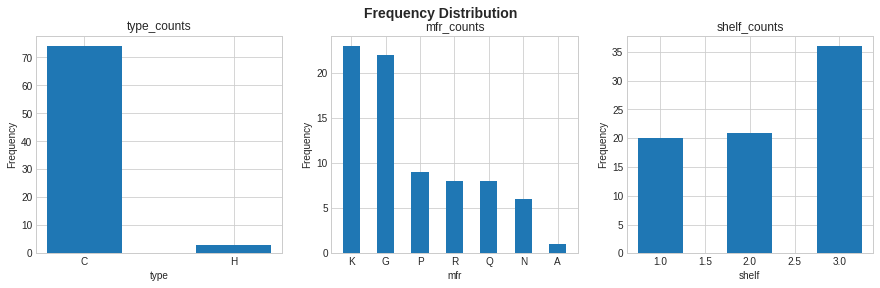

In [ ]:
plt.style.use('seaborn-whitegrid')



fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))


ax0.bar(type_counts.index.values, type_counts.values, width=0.5, align='center')
ax0.set(title = 'type_counts', xlabel='type' , ylabel = 'Frequency')

ax1.bar(mfr_counts.index.values, mfr_counts.values, width=0.5, align='center')
ax1.set(title = 'mfr_counts', xlabel='mfr' , ylabel = 'Frequency')

ax2.bar(shelf_counts.index.values, shelf_counts.values, width=0.5, align='center')
ax2.set(title = 'shelf_counts', xlabel='shelf' , ylabel = 'Frequency')

fig.suptitle('Frequency Distribution', fontsize=14, fontweight='bold');

[0.96103896 0.03896104]
[0.2987013  0.28571429 0.11688312 0.1038961  0.1038961  0.07792208
 0.01298701]
[0.46753247 0.27272727 0.25974026]


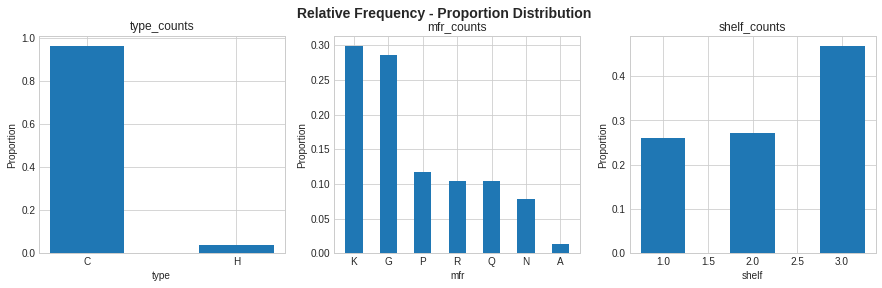

In [ ]:
num_rows = cereal_df['name'].count()

rel_freq_type = type_counts.values/num_rows
print(rel_freq_type)

rel_freq_mfr = mfr_counts.values/num_rows
print(rel_freq_mfr)

rel_freq_shelf = shelf_counts.values/num_rows
print(rel_freq_shelf)


plt.style.use('seaborn-whitegrid')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))


ax0.bar(type_counts.index.values, rel_freq_type, width=0.5, align='center')
ax0.set(title = 'type_counts', xlabel='type' , ylabel = 'Proportion')

ax1.bar(mfr_counts.index.values, rel_freq_mfr, width=0.5, align='center')
ax1.set(title = 'mfr_counts', xlabel='mfr' , ylabel = 'Proportion')

ax2.bar(shelf_counts.index.values, rel_freq_shelf, width=0.5, align='center')
ax2.set(title = 'shelf_counts', xlabel='shelf' , ylabel = 'Proportion')

fig.suptitle('Relative Frequency - Proportion Distribution', fontsize=14, fontweight='bold');

In [ ]:
group_mfr_shelf = cereal_df.groupby(['mfr','shelf'])['name']  

group_mfr_shelf.count()

mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    1         3
     2         2
     3         1
P    1         2
     2         1
     3         6
Q    1         1
     2         3
     3         4
R    1         4
     3         4
Name: name, dtype: int64

In [ ]:
cereal_df.groupby('mfr')

In [ ]:
cereal_df.groupby('mfr')['name']

In [ ]:
cereal_df.groupby('mfr')['name'].count()

mfr
A     1
G    22
K    23
N     6
P     9
Q     8
R     8
Name: name, dtype: int64

In [ ]:
print("group of mfr='P' contains these cereals")
cereal_df['name'][cereal_df['mfr'] == 'P']

print("group of mfr='Q' contains these cereals")
cereal_df['name'][cereal_df['mfr'] == 'Q']

group of mfr='P' contains these cereals
group of mfr='Q' contains these cereals


1      100% Natural Bran
10          Cap'n'Crunch
35      Honey Graham Ohs
41                  Life
54           Puffed Rice
55          Puffed Wheat
56    Quaker Oat Squares
57        Quaker Oatmeal
Name: name, dtype: object

In [ ]:
print('count')
cereal_df.groupby('mfr').count()
print('first')
cereal_df.groupby('mfr').first()
print('last')
cereal_df.groupby('mfr').last()

print('first and last - as per alphabetical sorting of names for a group')

count
first
last
first and last - as per alphabetical sorting of names for a group


In [ ]:
cereal_df.groupby('mfr').describe()

calories                         ...     rating                      
       count        mean        std  ...        50%        75%        max
mfr                                  ...                                 
A        1.0  100.000000        NaN  ...  54.850917  54.850917  54.850917
G       22.0  111.363636  10.371873  ...  36.181877  39.587829  51.592193
K       23.0  108.695652  22.218818  ...  40.560159  50.013484  93.704912
N        6.0   86.666667  10.327956  ...  68.319429  71.702084  74.472949
P        9.0  108.888889  10.540926  ...  40.917047  52.076897  53.371007
Q        8.0   95.000000  29.277002  ...  47.419974  53.310322  63.005645
R        8.0  115.000000  22.677868  ...  41.721976  45.528205  49.787445

[7 rows x 104 columns]

In [ ]:
cereal_df.groupby('mfr').describe().unstack()

                 mfr
calories  count  A       1.000000
                 G      22.000000
                 K      23.000000
                 N       6.000000
                 P       9.000000
                          ...    
rating    max    K      93.704912
                 N      74.472949
                 P      53.371007
                 Q      63.005645
                 R      49.787445
Length: 728, dtype: float64

In [ ]:
cereal_df.groupby('mfr').sum()
cereal_df.groupby('mfr').mean()
cereal_df.groupby('mfr').median()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,
A,100.0,4.0,1.0,0.0,0.0,16.00,3.0,95.0,25.0,2.0,1.0,1.000,54.850917
G,110.0,2.0,1.0,200.0,1.5,14.25,8.5,80.0,25.0,2.0,1.0,0.875,36.181877
K,110.0,3.0,0.0,170.0,1.0,15.00,7.0,60.0,25.0,3.0,1.0,0.750,40.560159
N,90.0,3.0,0.0,7.5,3.0,17.50,0.0,107.5,0.0,1.5,1.0,0.835,68.319429
P,110.0,3.0,1.0,160.0,3.0,13.00,10.0,90.0,25.0,3.0,1.0,0.670,40.917047
Q,100.0,2.5,2.0,75.0,1.5,12.00,6.0,72.5,12.5,2.5,1.0,0.875,47.419974
R,110.0,2.0,1.0,200.0,2.0,16.50,5.5,97.5,25.0,2.0,1.0,0.875,41.721976


In [ ]:
cereal_df.groupby('type')['name']
cereal_df.groupby('type')['name'].count()
cereal_df.groupby('mfr')['name'].count()
cereal_df.groupby('shelf')['name'].count()

shelf
1    20
2    21
3    36
Name: name, dtype: int64